### Importing libs and reading csv file

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

data = pd.read_csv("lab2_data.csv", sep='\t', decimal=",")
churn = data["churn"]
probs = data["churn_pred_prob"]

### Making helper functions

In [2]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

### sklearn ROC curve and AUC score

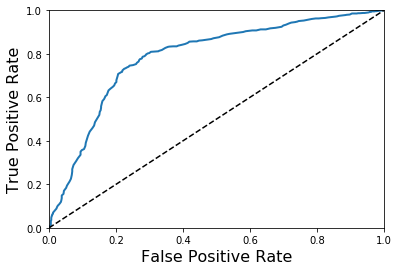

sklearn ROC AUC: 0.787281402032421


In [6]:
(fpr, tpr, thresholds) = metrics.roc_curve(churn, probs)
plot_roc_curve(fpr, tpr)
plt.show()

print("sklearn ROC AUC:", metrics.roc_auc_score(churn, probs))

### My ROC implementation

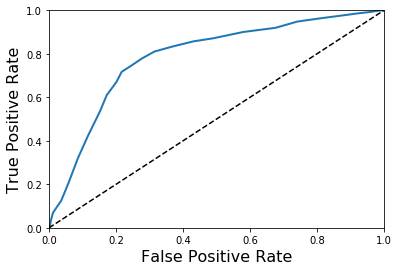

In [4]:
def roc_curve(values, scores): 
    min_score = min(scores)
    max_score = max(scores)
    thresholds = np.linspace(min_score, max_score, 30)

    tpr, fpr = [], []
    
    positive = sum(values)
    negative = len(values) - positive

    for threshold in thresholds:
        tp,fp = 0, 0
        for i in range(len(probs)):
            if (probs[i] > threshold):
                if (churn[i] == 1): tp += 1
                if (churn[i] == 0): fp += 1
        tpr.append(tp/positive)
        fpr.append(fp/negative)
    return (fpr, tpr)

(fpr, tpr) = roc_curve(churn, probs);
plot_roc_curve(fpr, tpr)
plt.show()

### My AUC imlpementation

In [5]:
def auc(x, y):
    order = np.lexsort((y, x))
    x = [x[i] for i in order]
    y = [y[i] for i in order]
    return np.trapz(y, x)

print(auc(fpr, tpr))

0.7852112565822017


### Conclusion

I was able to produce really close result to sk-learn for this particular dataset - it is hard to show those lines on same plot since they overlap a lot.

Based on AUC score we can conclude that classifier has decent quality - much better than random but at the same time has a lot of room for improvements.